In [7]:
from pathlib import Path

import librosa
import numpy
import pysptk
import pyworld

from become_yukarin.config import create_from_json as create_config
from become_yukarin.data_struct import Wave
from become_yukarin.dataset.dataset import *

from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
paths = [
    Path('C:/Users/hihok/dataset/hiho-pause-atr503') / 'atr503-1.wav',
    Path('C:/Users/hihok/dataset/yukari-pause-atr503') / 'yukari-pause-atr-0.wav',
]

wave_file_load = WaveFileLoadProcess(
    sample_rate=24000,
    top_db=None,
    pad_second=0.01,
)
acoustic_feature = AcousticFeatureProcess(
    frame_period=5,
    order=59,
    alpha=pysptk.util.mcepalpha(wave_file_load._sample_rate),
)

In [22]:
w = wave_file_load(paths[0], test=True)
Audio(data=w.wave, rate=w.sampling_rate)

In [15]:
f = acoustic_feature(w, test=True)

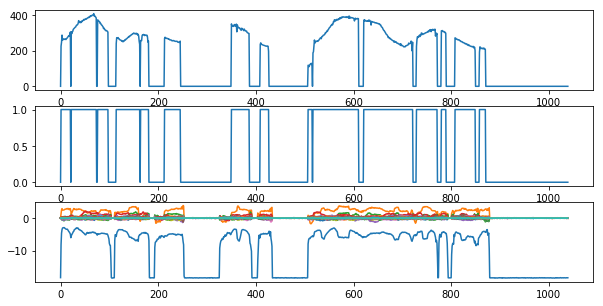

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.plot(f.f0)

plt.subplot(3, 1, 2)
plt.plot(f.f0!=0)

plt.subplot(3, 1, 3)
_ = plt.plot(f.mfcc)

In [17]:
fftlen = pyworld.get_cheaptrick_fft_size(wave_file_load._sample_rate)

spectrogram = pysptk.mc2sp(
    f.mfcc,
    alpha=acoustic_feature._alpha,
    fftlen=fftlen,
)

f = AcousticFeature(
    f0=f.f0,
    spectrogram=spectrogram,
    aperiodicity=f.aperiodicity,
    mfcc=f.mfcc,
    voiced=f.voiced,
).astype(numpy.float64)

out = pyworld.synthesize(
    f0=f.f0.ravel(),
    spectrogram=f.spectrogram,
    aperiodicity=f.aperiodicity,
    fs=wave_file_load._sample_rate,
    frame_period=acoustic_feature._frame_period,
)

Audio(data=out, rate=wave_file_load._sample_rate)